In [6]:
import numpy as np
from scipy import stats
import glob
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
datapath="plots/cramer_otgan_cosmo_primary_256_200k_batchSize256_learningRate_0.001_nUp5_flipLabel0.01_nd4_ng4_gfdim32_dfdim32_zdim64_nodes64_rank0"
step=340
filename=glob.glob(os.path.join(datapath,"step{s}_epoch*".format(s=step)))[0]

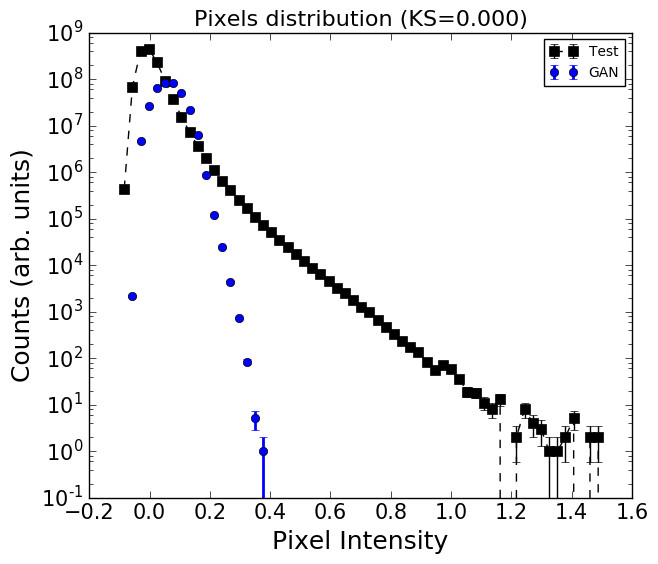

In [18]:
#get arrays from file
data = np.load(os.path.join(filename,"pixel_intensity.npz"))

#extract fields
test_bins = data["test_bins"]
test_hist = data["test_hist"]
test_err = np.sqrt(test_hist)
fake_bins = data["fake_bins"]
fake_hist = data["fake_hist"]
fake_err = np.sqrt(fake_hist)

#KS test
ks_test = stats.ks_2samp(test_hist, fake_hist)[1]

fig, ax = plt.subplots(figsize=(7,6))
#plot test
ax.errorbar(test_bins, test_hist, yerr=test_err, fmt='--ks', label='Test', markersize=7)

# plot generated
fake_label = 'GAN'
ax.errorbar(fake_bins, fake_hist, yerr=fake_err, fmt='o', label=fake_label, linewidth=2, markersize=6);

ax.legend(loc="best", fontsize=10)
ax.set_yscale('log');
ax.set_xlabel('Pixel Intensity', fontsize=18);
ax.set_ylabel('Counts (arb. units)', fontsize=18);
plt.tick_params(axis='both', labelsize=15, length=5)
plt.tick_params(axis='both', which='minor', length=3)
# plt.ylim(5e-10, 8*10**7)
# plt.xlim(-0.3,1.1)
plt.title('Pixels distribution (KS=%2.3f)'%ks_test, fontsize=16);